# Titanic - Machine Learning from the disaster

## Import the libraries

First, we need these libraries below to initialize our project.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualizzation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

## Explore the data

Load the data from the CSV file and understand the structure

In [2]:
train = pd.read_csv("data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(f"Training set size: {train.shape}")
print(f"Test set size: {test.shape}")

Training set size: (891, 12)
Test set size: (418, 11)


### Data description

- **survival**: 0 = No, 1 = Yes
- **pclass**: Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
- **sex**: male or female
- **age**: age in years, is fractional if less than 1
- **sibsp**: the number of siblings or spouses onboard
- **parch**: the number of parents or children onboard
- **ticket**: ticket numbers
- **fare**: passenger fare
- **cabin**: cabin number
- **embarked**: port of embarkation, where C = Cherbourg, Q = Queenstown, S = Southampton

### Statistical summary

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Mising data

Which columns in the dataset have missing data?

<AxesSubplot:>

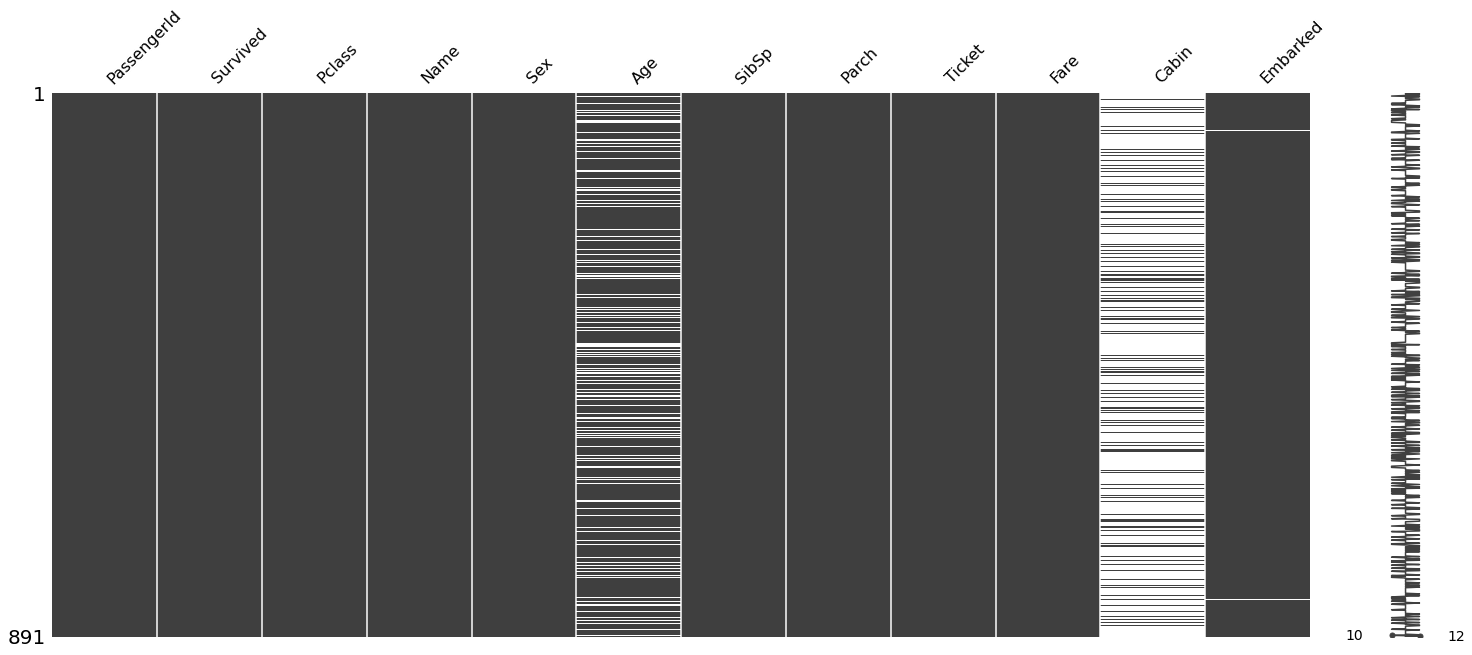

In [7]:
# Columns with missing data in training set
missingno.matrix(train)


<AxesSubplot:>

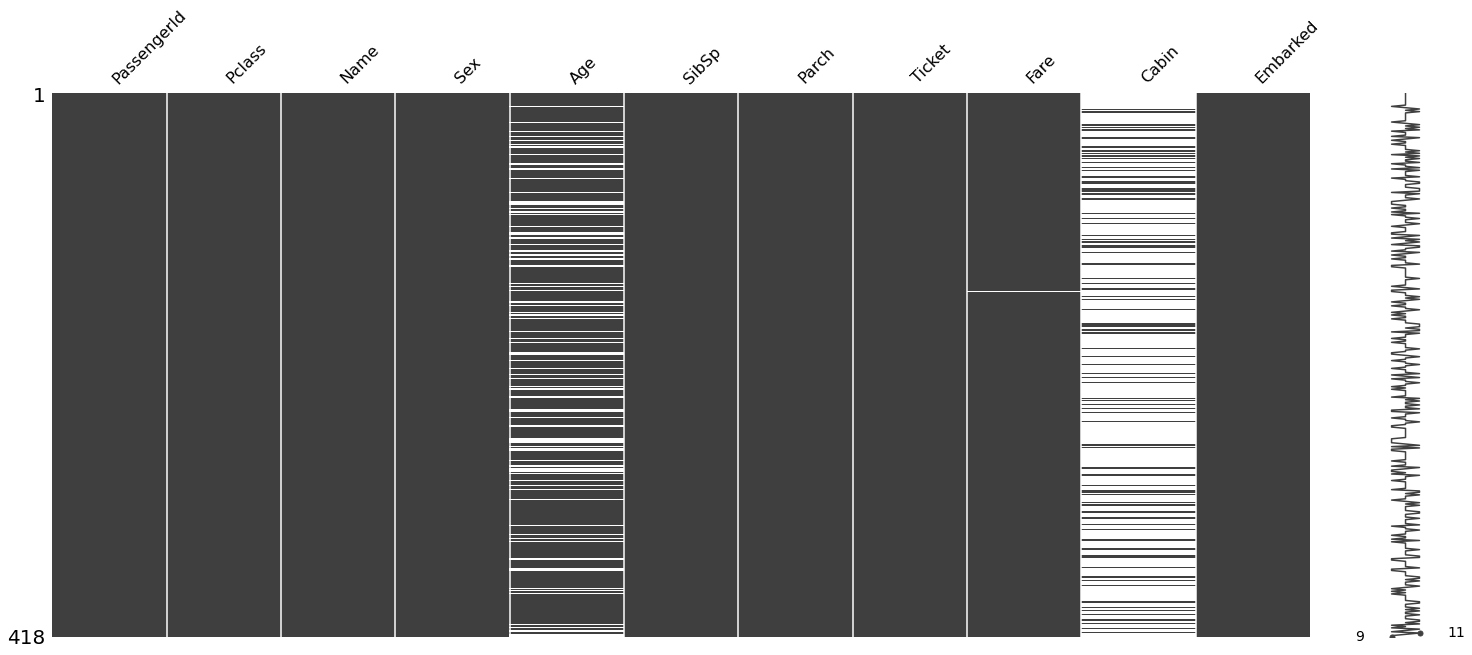

In [8]:
# Columns with missing data in test set
missingno.matrix(test)

## Data analysis

We will epxlore each variable in the data set. This may help us to choose the suitable machine learning models, or whether we need to determine the dataset.

### Categorical variables

- Nominal variables: **Sex**, **Emarked**
- Oridinal variables: **Pclass**

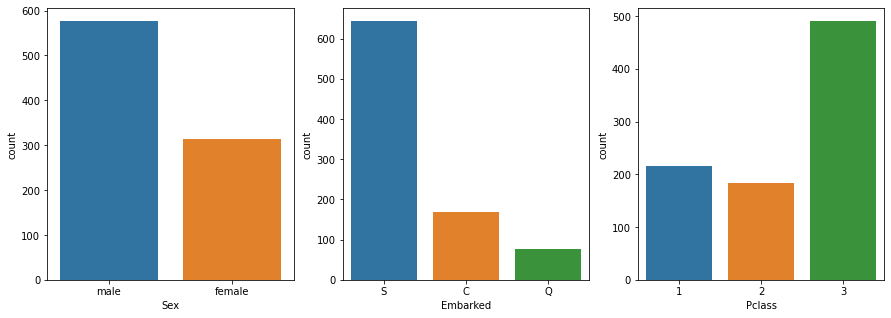

In [9]:
# Get the frequeny of each nominal variables
cat_features = ["Sex", "Embarked", "Pclass"]
f, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, data=train, ax=axes[i])

#### insights from counting plots

- There are more male passengers than female passengers
- Most passengers were departed from Southampton
- Most passengers were holding third-class tickets

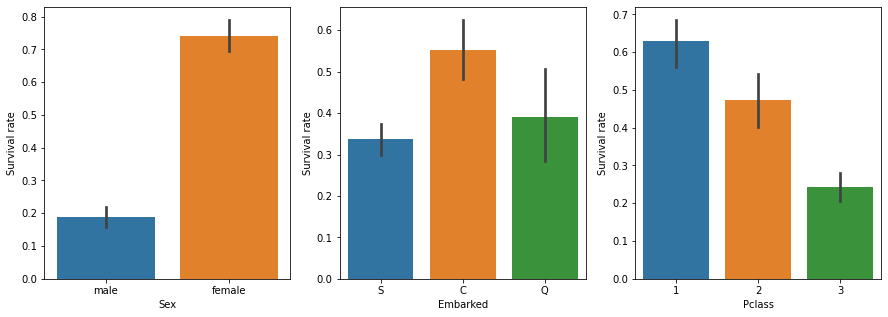

In [10]:
# What is the survival rate based on each categorical variables
f, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(cat_features):
    sns.barplot(x=feature, y="Survived", data=train, ax=axes[i])
    axes[i].set_ylabel("Survival rate")


#### insights about survival plots

- Female passengers were more likely to survive than male passengers. This may suggests that female passengers were prioritised to evacuate.
- Passengers from Cherbougs were the most likely to survive, while those from Southampton were the least.
- The higher the ticket classes were, the more likely the passengers to survived. This may suggest evacuation priority were based on the ticket class (first-class passengers first, thrid-class passengers last).

### Numerical variables

#### Outliers

Outliers are extreme values which do not conform the majority, and contribute the the skewness of the data set. Having outlier in the dataset may results in learning models with low accuracy. Therefore, we need to filter out these outliers for better models.

For this dataset, the filter is based on interquatile range ($IQR$), which means we will keep the numerical values when they are in range of

$$[Q_1 - 1.5 \cdot (Q_3 - Q_1), Q_3 + 1.5 \cdot (Q_3 - Q_1)]$$

where $Q_1$ is 25th percentile, $Q_3$ is 75th percentile

In [11]:
print(f"Before: {len(train)} rows")

def outliersIndices():
  numerical = train[["SibSp", "Parch", "Age", "Fare"]]
  q1 = numerical.quantile(.25)
  q3 = numerical.quantile(.75)
  iqr = q3 - q1
  low = q1 - 1.5 * iqr
  high = q3 + 1.5 * iqr
  # Only filter out the data if it has more than 2 outlier fields
  outlierCount = (~numerical.isnull() & ((numerical < low) | (numerical > high))).sum(axis=1)
  return outlierCount[outlierCount > 2].index
  
indices = outliersIndices()
print(f"Remove rows: {list(indices)}")

# Filter out
train = train.drop(indices, axis=0).reset_index(drop=True)
print(f"After: {len(train)} rows")


Before: 891 rows
Remove rows: [27, 88, 159, 180, 201, 324, 341, 745, 792, 846, 863]
After: 880 rows


#### Correlation

Some numerical variables may correlate with the survival state

In [12]:
train[["SibSp", "Parch", "Age", "Fare"]].corrwith(train["Survived"])

# Comment: There is some positive correlation between the fare and survival.

SibSp    0.003896
Parch    0.093612
Age     -0.074085
Fare     0.265561
dtype: float64

#### Discrete variables

`SipSp` and `Parch` are discrete variables

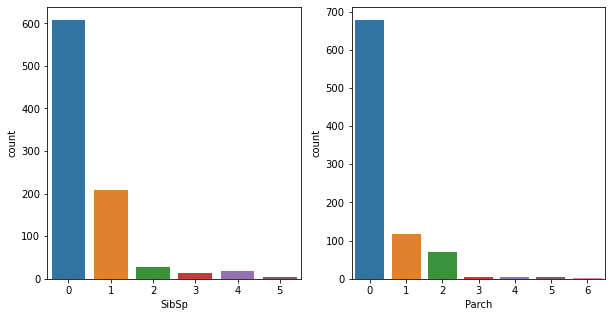

In [13]:
# Counting plots for discrete variables
f, axes = plt.subplots(1, 2, figsize=(10, 5))
discrete = ["SibSp", "Parch"]
for i, feature in enumerate(discrete):
    sns.countplot(x=feature, data=train, ax=axes[i])

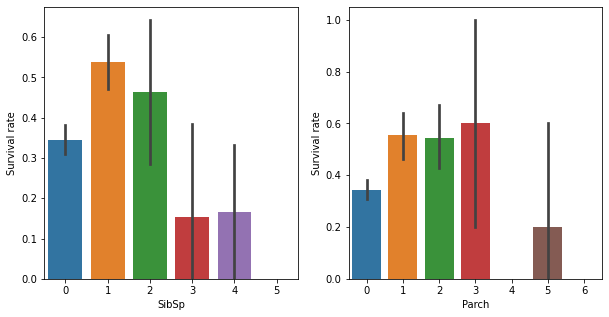

In [14]:
# What are the survival rates for pasenger based on their companions
f, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, feature in enumerate(discrete):
    sns.barplot(x=feature, y="Survived", data=train, ax=axes[i])
    axes[i].set_ylabel("Survival rate")

#### Continuous variables

`Age` and `Fare` are continuous variables in the dataset.

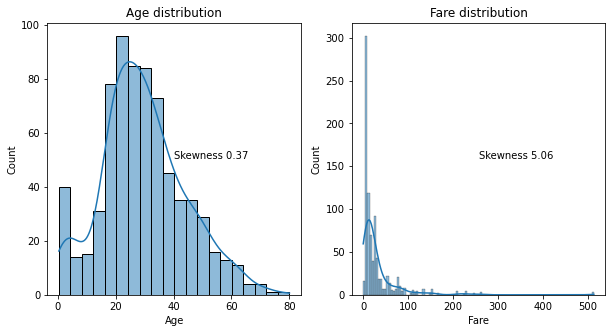

In [15]:
# What is the distribution for the countinuous variables?
f, axes = plt.subplots(1, 2, figsize=(10, 5))
continuous = ["Age", "Fare"]
for i, feature in enumerate(continuous):
    sns.histplot(train[feature], ax=axes[i], kde=True)
    axes[i].annotate("Skewness {:.2f}".format(train[feature].skew()), (0.5,0.5), xycoords="axes fraction")
    axes[i].set_title(f"{feature} distribution")

Text(0, 0.5, 'Survival Rate')

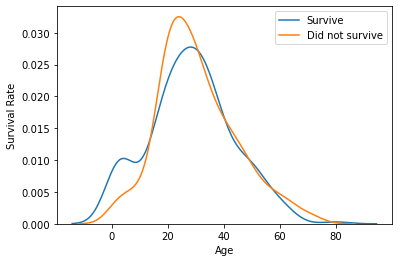

In [16]:
# What is the age distribution of whom were survived and who were not?
sns.kdeplot(train["Age"][train["Survived"] == 1], label="Survive")
sns.kdeplot(train["Age"][train["Survived"] == 0], label="Did not survive")
plt.legend(loc="best")
plt.ylabel('Survival Rate')